In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re

In [190]:
df = pd.read_csv(r"C:\Users\Hp\Desktop\daraz_data.csv" )
df

,Unnamed: 0,Name,Rating,Number of Ratings,Price
0,0,Redmi A2+ 3GB - 64GB 5000mAh 10W fast charging...,4.7/5,(240),"19,299"
1,1,"Redmi 13C 6GB RAM-128GB ROM 6.74"" Dot Drop d...",4.8/5,(13),"32,999"
2,2,Redmi A2+ || 3GB Ram 64GB Rom || 5000mAh Batte...,4.7/5,(156),"19,499"
3,3,Infinix Note 30 RAM 8GB+8GB & 256GB Storage 6....,4.5/5,(82),"40,899"
4,4,Tecno SPARK 10C 4GB RAM -128GB ROM 5000mAh PT...,4.6/5,(118),"28,449"
...,...,...,...,...,...
1490,1490,Redmi note 12 8GB RAM -128GB ROM PTA APPROVED ...,5/5,(1),"47,999"
1491,1491,Tecno Pova 5 Pro 5G - 8+8GB RAM 256GB ROM 6.78...,5/5,(1),"59,980"
1492,1492,Xiaomi Poco C 65 RAM 6 GB ROM 128 GB Front Cam...,5/5,(1),"39,999"
1493,1493,"Tecno Spark Go 2024 , 4GB RAM 64GB ROM , Back ...",5/5,(1),"26,499"


In [191]:
print("DataFrame Information:")
print("-" * 30)
print('DF Shape: ' ,df.shape)
print('number of Columns: ' ,len(df.columns))
print('number of Observations: ' ,len(df))
print('Number of values in df: ' , df.count().sum())
print('Total Number of Missing values in df: ' , df.isna().sum().sum())
print('percentage of Missing values : ' ,  "{:.2f}".format(df.isna().sum().sum()/df.count().sum() *100),'%')
print('Total Number of Duplicated records in df : ' , df.duplicated().sum().sum())
print('percentage of Duplicated values : ' ,  "{:.2f}".format(df.duplicated().sum().sum()/df.count().sum() *100),'%')

DataFrame Information:
------------------------------
DF Shape:  (1495, 5)
number of Columns:  5
number of Observations:  1495
Number of values in df:  7475
Total Number of Missing values in df:  0
percentage of Missing values :  0.00 %
Total Number of Duplicated records in df :  0
percentage of Duplicated values :  0.00 %


In [192]:
df.drop('Unnamed: 0' , axis= 1 , inplace=True)

In [193]:
df['Name'] = df['Name'].str.lower()

In [194]:
df['Name']

0       redmi a2+ 3gb - 64gb 5000mah 10w fast charging...
1       redmi 13c  6gb ram-128gb rom  6.74" dot drop d...
2       redmi a2+ || 3gb ram 64gb rom || 5000mah batte...
3       infinix note 30 ram 8gb+8gb & 256gb storage 6....
4       tecno spark 10c  4gb ram -128gb rom 5000mah pt...
                              ...                        
1490    redmi note 12 8gb ram -128gb rom pta approved ...
1491    tecno pova 5 pro 5g - 8+8gb ram 256gb rom 6.78...
1492    xiaomi poco c 65 ram 6 gb rom 128 gb front cam...
1493    tecno spark go 2024 , 4gb ram 64gb rom , back ...
1494    itel a27 4g || 2gb ram 32gb rom || 4000mah bat...
Name: Name, Length: 1495, dtype: object

In [195]:
def brand(input):
    x = re.sub(r'[.-]', '', input.split()[0])
    if x in ['s9', 's6', 's3']:
        return 'sparx'
    elif x == 'moto':
        return 'motorola'
    elif x == 'iphone':
        return 'apple'
    elif x in ['spark', 'tecn']:
        return 'tecno'
    elif x == 'galaxy':
        return 'samsung'
    elif x in ['zero' , 'hot']:
        return 'infinix'
    elif x == 'n':
        return 'neo'
    elif x == 'itela60s':
        return 'itel'
    elif x == 'dcode':
        return 'decode'
    elif x == 'a17':
        return 'oppo'
    elif x == 'vgo':
        return 'vgotel'
    else:
        return x

df['Brand'] = df['Name'].apply(brand)
df['Brand'].unique()

array(['redmi', 'infinix', 'tecno', 'samsung', 'vivo', 'xiaomi', 'realme',
       'imported', 'oppo', 'sparx', 'itel', 'neo', 'vgotel', 'nokia',
       'etachi', 'b', 'calme', 'zte', '(phone', 'decode', 'google',
       'sony', 'motorola', 'digit', 'kxd', 'x', 'apple', 'honor',
       'oneplus', 'gfive', 'vnus', 'qmobile', 'aquos', 'fujitsu',
       'huawei', 'xsmart', 'poco'], dtype=object)

In [196]:
def s_size(input):
    pattern = r'(\d+(\.\d{1,2})?)"\s*'
    match = re.search(pattern, input)
    if match:
        f = match.group(1)
        return float(f)
    else:
        return None
    
def rom(input):
    pattern = r'(\w+)\s*gb'
    match = re.findall(pattern, input.lower())
    if match:
        return float(max(match, key=len))
    else:
        return None

def ram(input):
    pattern = r'(\w+)\s*gb'
    match = re.findall(pattern, input.lower())
    if len(match) >= 2:
        return float(min(match, key=len))
    else:
        return None
    
def battery(input):
    pattern = r'(\w+)\s*mah'
    match = re.search(pattern, input)
    if match:
        f = match.group(1)
        pattern = r'\d+'
        match = re.search(pattern, f)
        return float(match.group(0))
    else:
        return None
def fast_charging(input):
    if pd.Series(input).str.contains('fast|\d+w').any():
        return 'Yes'
    else: return 'No'

def warranty(input):
    if pd.Series(input).str.contains('warranty').bool():
        return 'Yes'
    else: return 'No'
    
df['Screen_Size'] = df['Name'].apply(s_size)
df['Battery'] = df['Name'].apply(battery)
df['ROM'] = df['Name'].apply(rom)
df['RAM'] = df['Name'].apply(ram)
df['Fast Charging'] = df['Name'].apply(fast_charging)
df['Warrnaty'] = df["Name"].apply(warranty)
df['Rating'] = df['Rating'].str.replace('/5', '').astype(float)
df['Number of Ratings'] = df['Number of Ratings'].str.replace(r'\(|\)', '', regex=True).astype(int)
df['Price'] = df['Price'].apply(lambda x: int(x.replace(',', '')))
df


,Name,Rating,Number of Ratings,Price,Brand,Screen_Size,Battery,ROM,RAM,Fast Charging,Warrnaty
0,redmi a2+ 3gb - 64gb 5000mah 10w fast charging...,4.7,240,19299,redmi,NaN,5000.0,64.0,3.0,Yes,No
1,"redmi 13c 6gb ram-128gb rom 6.74"" dot drop d...",4.8,13,32999,redmi,6.74,5000.0,128.0,6.0,No,Yes
2,redmi a2+ || 3gb ram 64gb rom || 5000mah batte...,4.7,156,19499,redmi,NaN,5000.0,64.0,3.0,No,No
3,infinix note 30 ram 8gb+8gb & 256gb storage 6....,4.5,82,40899,infinix,6.78,5000.0,256.0,8.0,No,Yes
4,tecno spark 10c 4gb ram -128gb rom 5000mah pt...,4.6,118,28449,tecno,NaN,5000.0,128.0,4.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1490,redmi note 12 8gb ram -128gb rom pta approved ...,5.0,1,47999,redmi,NaN,NaN,128.0,8.0,Yes,Yes
1491,tecno pova 5 pro 5g - 8+8gb ram 256gb rom 6.78...,5.0,1,59980,tecno,NaN,5000.0,256.0,8.0,Yes,No
1492,xiaomi poco c 65 ram 6 gb rom 128 gb front cam...,5.0,1,39999,xiaomi,NaN,5000.0,128.0,6.0,No,No
1493,"tecno spark go 2024 , 4gb ram 64gb rom , back ...",5.0,1,26499,tecno,NaN,5000.0,64.0,4.0,No,No


In [197]:
print("DataFrame Information:")
print("-" * 30)
print('DF Shape: ' ,df.shape)
print('number of Columns: ' ,len(df.columns))
print('number of Observations: ' ,len(df))
print('Number of values in df: ' , df.count().sum())
print('Total Number of Missing values in df: ' , df.isna().sum().sum())
print('percentage of Missing values : ' ,  "{:.2f}".format(df.isna().sum().sum()/df.count().sum() *100),'%')
print('Total Number of Duplicated records in df : ' , df.duplicated().sum().sum())
print('percentage of Duplicated values : ' ,  "{:.2f}".format(df.duplicated().sum().sum()/df.count().sum() *100),'%')

DataFrame Information:
------------------------------
DF Shape:  (1495, 11)
number of Columns:  11
number of Observations:  1495
Number of values in df:  14663
Total Number of Missing values in df:  1782
percentage of Missing values :  12.15 %
Total Number of Duplicated records in df :  737
percentage of Duplicated values :  5.03 %


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1495 non-null   object 
 1   Rating             1495 non-null   float64
 2   Number of Ratings  1495 non-null   int32  
 3   Price              1495 non-null   int64  
 4   Brand              1495 non-null   object 
 5   Screen_Size        317 non-null    float64
 6   Battery            1047 non-null   float64
 7   ROM                1465 non-null   float64
 8   RAM                1369 non-null   float64
 9   Fast Charging      1495 non-null   object 
 10  Warrnaty           1495 non-null   object 
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 122.8+ KB


In [199]:
df.describe()

,Rating,Number of Ratings,Price,Screen_Size,Battery,ROM,RAM
count,1495.000000,1495.000000,1495.000000,317.000000,1047.000000,1465.000000,1369.000000
mean,4.586488,27.418729,43487.989967,8.804479,4927.731614,125.907167,5.674215
std,0.717997,55.777742,33161.944505,41.481799,481.724056,78.990961,4.116603
min,1.000000,1.000000,2525.000000,5.000000,500.000000,1.000000,1.000000
25%,4.500000,2.000000,25499.000000,6.500000,5000.000000,64.000000,4.000000
50%,4.800000,5.000000,34999.000000,6.600000,5000.000000,128.000000,4.000000
75%,5.000000,23.500000,46999.000000,6.700000,5000.000000,128.000000,8.000000
max,5.000000,362.000000,329999.000000,745.000000,8000.000000,512.000000,128.000000


In [200]:
df.describe(include='O')

,Name,Brand,Fast Charging,Warrnaty
count,1495,1495,1495,1495
unique,676,37,2,2
top,"redmi note 12 8gb ram 128gb rom, display size...",infinix,No,No
freq,11,211,1264,1211


In [201]:
df.nunique()

Name                 676
Rating                24
Number of Ratings     77
Price                380
Brand                 37
Screen_Size           30
Battery               25
ROM                   13
RAM                   10
Fast Charging          2
Warrnaty               2
dtype: int64

<Figure size 1000x600 with 0 Axes>

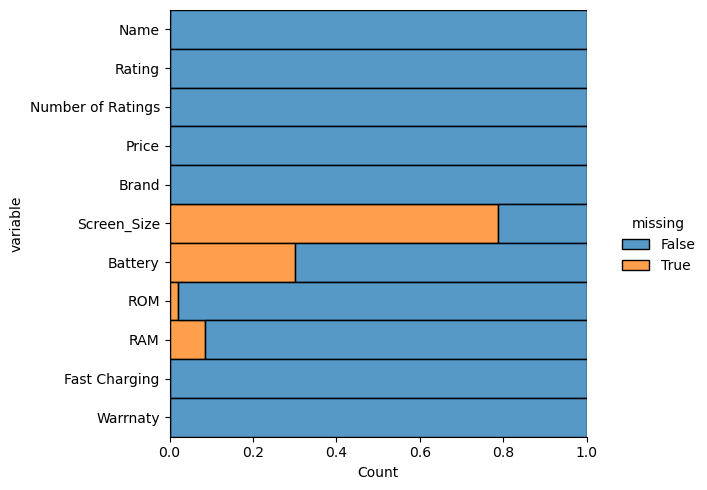

In [202]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.show()

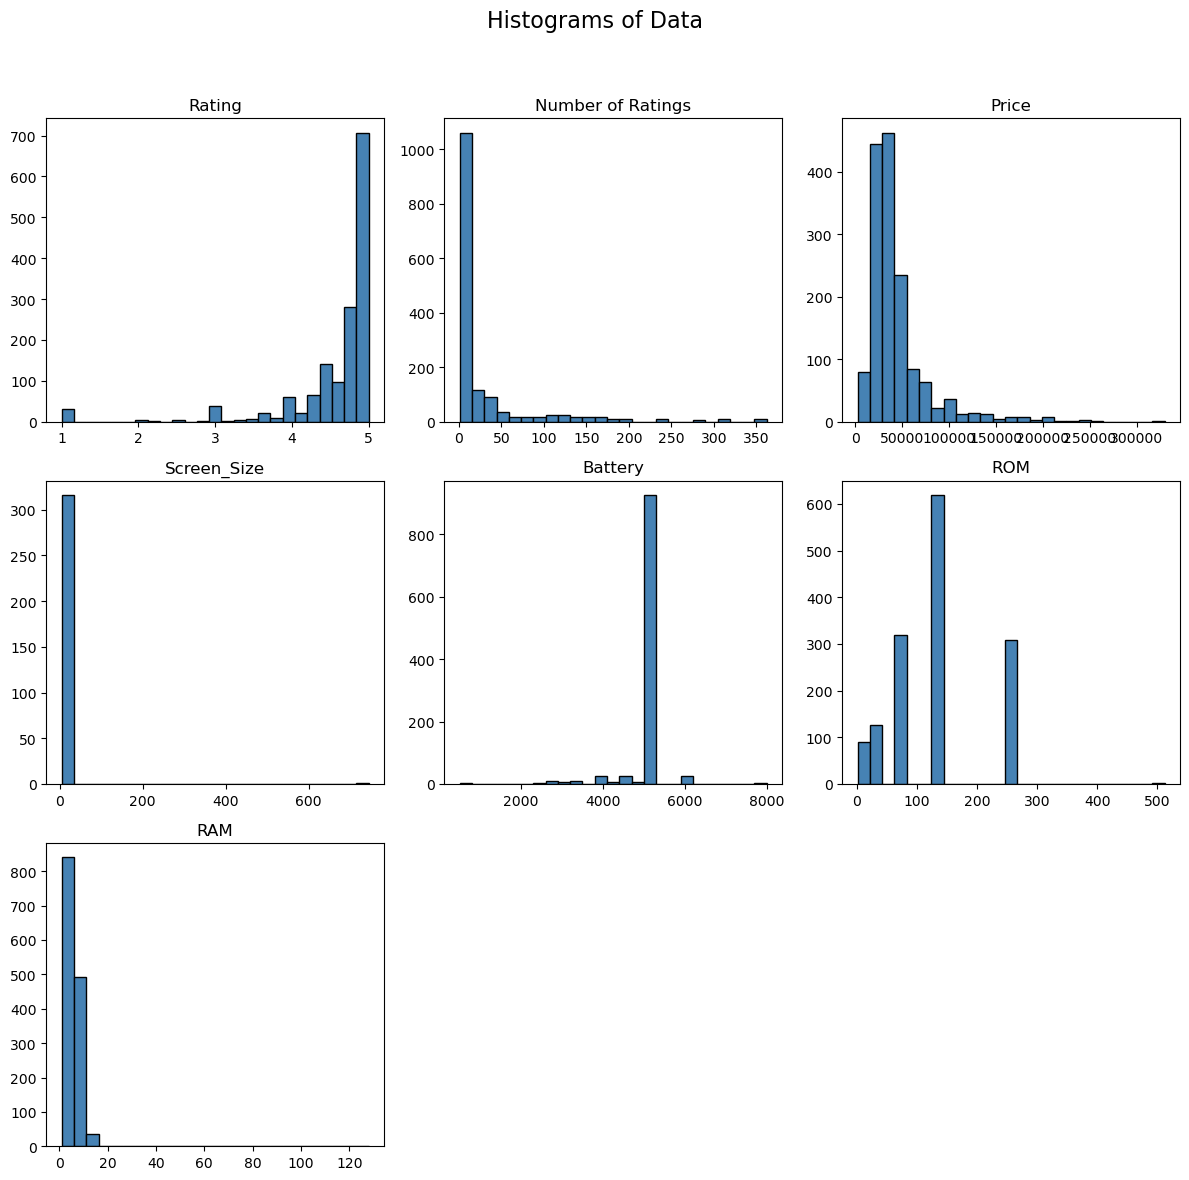

In [203]:
df.hist(bins = 25, color='steelblue', edgecolor='black', grid=False , figsize = (12, 12) )
# Add titles and labels
plt.suptitle('Histograms of Data', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing between subplots
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Modify tick font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove outer spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [204]:
fig = make_subplots(rows=1, cols=3 ,subplot_titles=['Brand','Fast Charging','Warrnaty'])

# Add histograms
fig.add_trace(go.Histogram(x=df['Brand']), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Fast Charging']), row=1, col=2)
fig.add_trace(go.Histogram(x=df['Warrnaty']), row=1, col=3)

# Show the plot
fig.show()

In [205]:
from sklearn.impute import KNNImputer
import pandas as pd

# Assuming df is your original DataFrame
feature = ['Rating', 'Number of Ratings', 'Price', 'Screen_Size', 'Battery', 'ROM', 'RAM']

# Creating KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Performing imputation and converting the result back to DataFrame
df[feature] = imputer.fit_transform(df[feature])
df = pd.DataFrame(df, columns=df.columns)  # Convert the NumPy array back to a DataFrame
df

,Name,Rating,Number of Ratings,Price,Brand,Screen_Size,Battery,ROM,RAM,Fast Charging,Warrnaty
0,redmi a2+ 3gb - 64gb 5000mah 10w fast charging...,4.7,240.0,19299.0,redmi,6.520,5000.0,64.0,3.0,Yes,No
1,"redmi 13c 6gb ram-128gb rom 6.74"" dot drop d...",4.8,13.0,32999.0,redmi,6.740,5000.0,128.0,6.0,No,Yes
2,redmi a2+ || 3gb ram 64gb rom || 5000mah batte...,4.7,156.0,19499.0,redmi,6.520,5000.0,64.0,3.0,No,No
3,infinix note 30 ram 8gb+8gb & 256gb storage 6....,4.5,82.0,40899.0,infinix,6.780,5000.0,256.0,8.0,No,Yes
4,tecno spark 10c 4gb ram -128gb rom 5000mah pt...,4.6,118.0,28449.0,tecno,6.600,5000.0,128.0,4.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1490,redmi note 12 8gb ram -128gb rom pta approved ...,5.0,1.0,47999.0,redmi,6.725,5000.0,128.0,8.0,Yes,Yes
1491,tecno pova 5 pro 5g - 8+8gb ram 256gb rom 6.78...,5.0,1.0,59980.0,tecno,6.650,5000.0,256.0,8.0,Yes,No
1492,xiaomi poco c 65 ram 6 gb rom 128 gb front cam...,5.0,1.0,39999.0,xiaomi,6.790,5000.0,128.0,6.0,No,No
1493,"tecno spark go 2024 , 4gb ram 64gb rom , back ...",5.0,1.0,26499.0,tecno,6.550,5000.0,64.0,4.0,No,No


In [206]:
from sklearn.ensemble import IsolationForest
IF = IsolationForest(contamination=0.1 , random_state=42)
IF.fit(df[feature])
df['anomaly_scores'] = IF.decision_function(df[feature])
df['anomaly'] = IF.predict(df[feature])

In [207]:
df['anomaly'].value_counts()

 1    1346
-1     149
Name: anomaly, dtype: int64

In [208]:
df.drop(df.loc[df['anomaly']==-1].index, inplace=True)
df.reset_index()
df.drop(['anomaly' , 'anomaly_scores' ], axis = 1 , inplace= True)
df

,Name,Rating,Number of Ratings,Price,Brand,Screen_Size,Battery,ROM,RAM,Fast Charging,Warrnaty
0,redmi a2+ 3gb - 64gb 5000mah 10w fast charging...,4.7,240.0,19299.0,redmi,6.520,5000.0,64.0,3.0,Yes,No
1,"redmi 13c 6gb ram-128gb rom 6.74"" dot drop d...",4.8,13.0,32999.0,redmi,6.740,5000.0,128.0,6.0,No,Yes
2,redmi a2+ || 3gb ram 64gb rom || 5000mah batte...,4.7,156.0,19499.0,redmi,6.520,5000.0,64.0,3.0,No,No
3,infinix note 30 ram 8gb+8gb & 256gb storage 6....,4.5,82.0,40899.0,infinix,6.780,5000.0,256.0,8.0,No,Yes
4,tecno spark 10c 4gb ram -128gb rom 5000mah pt...,4.6,118.0,28449.0,tecno,6.600,5000.0,128.0,4.0,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1489,samsung galaxy a13 || 4gb ram 128gb rom || 6.6...,5.0,1.0,59999.0,samsung,6.650,5000.0,128.0,4.0,Yes,No
1490,redmi note 12 8gb ram -128gb rom pta approved ...,5.0,1.0,47999.0,redmi,6.725,5000.0,128.0,8.0,Yes,Yes
1491,tecno pova 5 pro 5g - 8+8gb ram 256gb rom 6.78...,5.0,1.0,59980.0,tecno,6.650,5000.0,256.0,8.0,Yes,No
1492,xiaomi poco c 65 ram 6 gb rom 128 gb front cam...,5.0,1.0,39999.0,xiaomi,6.790,5000.0,128.0,6.0,No,No


In [209]:
df[feature].skew()

Rating               -3.303556
Number of Ratings     3.235660
Price                 2.068909
Screen_Size          36.682174
Battery              -1.895770
ROM                   0.627967
RAM                  20.660751
dtype: float64

In [210]:
for i in df.columns:
    if df[i].dtype != object  and i != 'Price':
        if df[i].skew() > 0.5: 
            df[i] = df[i].apply(lambda x: np.log(x))

In [211]:
df[feature].skew()

Rating               -3.303556
Number of Ratings     0.566990
Price                 2.068909
Screen_Size          33.268964
Battery              -1.895770
ROM                  -1.683949
RAM                  -0.162800
dtype: float64

In [212]:
df.describe()

,Rating,Number of Ratings,Price,Screen_Size,Battery,ROM,RAM
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000
mean,4.635067,1.803248,39686.212481,1.885853,4935.705795,4.549200,1.602834
std,0.624782,1.552728,22219.077654,0.133141,401.626090,0.864147,0.465810
min,1.000000,0.000000,2525.000000,1.695616,2400.000000,0.000000,0.000000
25%,4.500000,0.693147,25999.000000,1.874874,5000.000000,4.158883,1.386294
50%,4.800000,1.609438,34999.000000,1.887070,5000.000000,4.852030,1.386294
75%,5.000000,2.890372,46299.000000,1.897620,5000.000000,4.852030,2.079442
max,5.000000,5.620401,185750.000000,6.613384,8000.000000,5.545177,4.852030


In [213]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Brand','Fast Charging','Warrnaty']:
    df[i] = le.fit_transform(df[i])

df.drop('Name' , axis= 1 , inplace=True)


In [214]:
correlation_matrix = df.corr()

correlations_with_Status = correlation_matrix['Price']
sorted_features = correlations_with_Status.abs().sort_values(ascending=False)
correlation_df = pd.DataFrame({
    'Feature': sorted_features.index,
    'Correlation with Target': sorted_features.values
})

correlation_df

,Feature,Correlation with Target
0,Price,1.000000
1,RAM,0.573512
2,ROM,0.386496
3,Battery,0.206720
4,Brand,0.125632
5,Fast Charging,0.092350
6,Warrnaty,0.036969
7,Screen_Size,0.023838
8,Rating,0.013654
9,Number of Ratings,0.004281


In [215]:
y = df.pop('Price')

In [216]:
px.histogram(y)

In [217]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

kbest = SelectKBest(f_classif, k=6)
x = kbest.fit_transform(df, y)

print('Selected features:',  df.columns[kbest.get_support()].tolist())

Selected features: ['Number of Ratings', 'Brand', 'Battery', 'ROM', 'RAM', 'Warrnaty']


In [218]:
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold= 0.7)
varx = var.fit_transform(df,y)
print('Selected features:',  df.columns[var.get_support()].tolist())

Selected features: ['Number of Ratings', 'Brand', 'Battery', 'ROM']


In [219]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = sc.fit_transform(x)
x

array([[ 2.36922229,  0.16770298,  0.16014423, -0.45184726, -1.08286454,
        -0.47760045],
       [ 0.49073942,  0.16770298,  0.16014423,  0.35056838,  0.40573506,
         2.09380037],
       [ 2.09168302,  0.16770298,  0.16014423, -0.45184726, -1.08286454,
        -0.47760045],
       ...,
       [-1.16177307,  0.71758899,  0.16014423,  1.15298403,  1.02355971,
        -0.47760045],
       [-1.16177307,  1.40494651,  0.16014423,  0.35056838,  0.40573506,
        -0.47760045],
       [-1.16177307,  0.71758899,  0.16014423, -0.45184726, -0.46503988,
        -0.47760045]])

In [220]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x,y , train_size=0.7 , random_state=42)


In [221]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

In [228]:
rf = RandomForestRegressor()

param = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20],
          'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(estimator=rf, param_grid=param, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(xtrain, ytrain)

rf_best_model = grid_search.best_estimator_

print('Best Parameters: ' , (grid_search.best_params_))

mse_train = mean_absolute_error(ytrain,  rf_best_model.predict(xtrain))
mse_test = mean_absolute_error(ytest, rf_best_model.predict(xtest))

r2_train = r2_score(ytrain,  rf_best_model.predict(xtrain))
r2_test = r2_score(ytest, rf_best_model.predict(xtest))

print(f"Mean Squared Error on Training Set: {mse_train}")
print(f"Mean Squared Error on Test Set: {mse_test}")

print(f"R2 on Training Set: {r2_train}")
print(f"R2 on Test Set: {r2_test}")

Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error on Training Set: 2317.0307046163493
Mean Squared Error on Test Set: 3979.4838883915954
R2 on Training Set: 0.9458921731809423
R2 on Test Set: 0.8559625074151005


In [223]:
xgb = XGBRegressor()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(xtrain, ytrain)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

xgb_best_model = grid_search.best_estimator_


mse_train = mean_absolute_error(ytrain,  xgb_best_model.predict(xtrain))
mse_test = mean_absolute_error(ytest, xgb_best_model.predict(xtest))

r2_train = r2_score(ytrain,  xgb_best_model.predict(xtrain))
r2_test = r2_score(ytest, xgb_best_model.predict(xtest))

print(f"Mean Squared Error on Training Set: {mse_train}")
print(f"Mean Squared Error on Test Set: {mse_test}")

print(f"R2 on Training Set: {r2_train}")
print(f"R2 on Test Set: {r2_test}")


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Mean Squared Error on Training Set: 2704.5068929554805
Mean Squared Error on Test Set: 3933.275225044477
R2 on Training Set: 0.9408312249082309
R2 on Test Set: 0.8637763023363305


In [224]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1, random_state=42)


In [225]:
from tensorflow import keras
from keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dropout

early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 5,
    restore_best_weights = True
)

model = keras.Sequential([
    layers.Dense(units = 32 , activation= 'relu' , input_shape = (6,) ),
    layers.Dense(units = 64 , activation= 'relu'),
    layers.Dropout(0.2),
    layers.Dense(units = 128 , activation= 'relu'),
    layers.Dense(units = 256 , activation= 'relu'),
    layers.Dropout(0.2),
    layers.Dense(units = 512 , activation= 'relu'),
    layers.Dense(units = 1024 , activation= 'relu'),
    layers.Dropout(0.2),
    layers.Dense(units = 1024 , activation= 'relu'),
    layers.Dense(units = 1 , activation= 'linear')

])
model.compile(loss= 'mae' , optimizer = 'adam') 
history = model.fit(X_train , y_train ,
                    validation_data = (X_val , y_val),
                    epochs=100 , batch_size=512 ,
                    callbacks=[early_stopping])


Epoch 1/100
2/2 [==============================] - 3s 344ms/step - loss: 40273.5547 - val_loss: 40030.4648
Epoch 2/100
2/2 [==============================] - 0s 110ms/step - loss: 40270.9102 - val_loss: 40025.0273
Epoch 3/100
2/2 [==============================] - 0s 101ms/step - loss: 40262.3867 - val_loss: 40008.4414
Epoch 4/100
2/2 [==============================] - 0s 96ms/step - loss: 40238.3086 - val_loss: 39965.1055
Epoch 5/100
2/2 [==============================] - 0s 99ms/step - loss: 40177.3008 - val_loss: 39863.3516
Epoch 6/100
2/2 [==============================] - 0s 116ms/step - loss: 40040.3125 - val_loss: 39640.4531
Epoch 7/100
2/2 [==============================] - 0s 98ms/step - loss: 39750.3828 - val_loss: 39179.3398
Epoch 8/100
2/2 [==============================] - 0s 98ms/step - loss: 39154.0703 - val_loss: 38289.6445
Epoch 9/100
2/2 [==============================] - 0s 118ms/step - loss: 37999.2305 - val_loss: 36664.5898
Epoch 10/100
2/2 [=======================

Minimum Validation Loss: 10681.5801


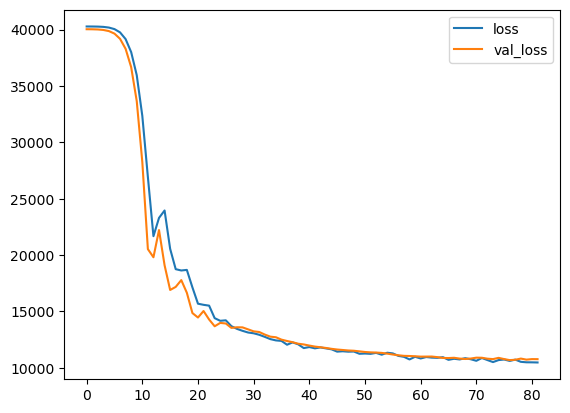

In [226]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [227]:
mse_train = mean_absolute_error(ytrain,  model.predict(xtrain))
mse_test = mean_absolute_error(ytest, model.predict(xtest))

r2_train = r2_score(ytrain,  model.predict(xtrain))
r2_test = r2_score(ytest, model.predict(xtest))

print(f"Mean Squared Error on Training Set: {mse_train}")
print(f"Mean Squared Error on Test Set: {mse_test}")

print(f"R2 Error on Training Set: {r2_train}")
print(f"R2 Squared Error on Test Set: {r2_test}")

13/13 [==============================] - 0s 8ms/step
Mean Squared Error on Training Set: 10178.149267889132
Mean Squared Error on Test Set: 8926.719895768874
R2 Error on Training Set: 0.4161784170148425
R2 Squared Error on Test Set: 0.3910631844378647


In [234]:
data = {
    'Model': ['Keras Sequential', 'XGBoost', 'Random Forest'],
    'MSE (Training)': [10178.149267889132, 2704.5068929554805, 2317.0307046163493],
    'MSE (Test)': [8926.719895768874, 3933.275225044477, 3979.4838883915954],
    'R2 (Training)': [0.4161784170148425, 0.9408312249082309, 0.9458921731809423],
    'R2 (Test)': [0.3910631844378647, 0.8637763023363305, 0.8559625074151005],
}

df = pd.DataFrame(data)
df_sorted = df.sort_values(by='MSE (Test)', ascending=True)
df_sorted


,Model,MSE (Training),MSE (Test),R2 (Training),R2 (Test)
1,XGBoost,2704.506893,3933.275225,0.940831,0.863776
2,Random Forest,2317.030705,3979.483888,0.945892,0.855963
0,Keras Sequential,10178.149268,8926.719896,0.416178,0.391063
